In [1]:
 # Dependencies
from bs4 import BeautifulSoup
import requests
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import pymongo

In [2]:
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Define database and collection
db = client.vacations_db
collection_climate = db.climate
collection_destinations = db.destinations

In [3]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 95.0.4638
Get LATEST driver version for 95.0.4638
Driver [C:\Users\Steph\.wdm\drivers\chromedriver\win32\95.0.4638.54\chromedriver.exe] found in cache


In [4]:
browser.visit('https://viewfinder.expedia.com/top-rated-vacation-destinations-in-north-america/')
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

title = soup.find('h1', 'post-title title title-large entry-title')

print(title.text)
print("done")

Top-rated vacation destinations in North America
done


In [5]:
browser.visit('https://viewfinder.expedia.com/top-rated-vacation-destinations-in-north-america/')
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

dest = soup.find_all('h3')

dest_names = []

i = 0

for i in range(0,55):
    dest_names.append(dest[i].text)
#     print(dest[i].text)
 
print(dest_names)

['1. Wailea, Hawaii', '2. Cambria, California', '3. Springdale, Utah', '4. Quebec City, Quebec', '5. Ashland, Oregon', '6. Calgary, Alberta', '7. Victoria, British Columbia', '8. Sedona, Arizona', '9. Cambridge, Massachusetts', '10. Minneapolis, Minnesota', '11. Paso Robles, California', '12. Solvang, California', '13. Bar Harbor, Maine', '14. Key West, Florida', '15. Sanibel, Florida', '16. Pittsburgh, Pennsylvania', '17. Washington, D.C.', '18. Charleston, South Carolina', '19. Rosemont, Illinois', '20. Montreal, Quebec', '21. Durango, Colorado', '22. Vancouver, British Columbia', '23. Kihei, Hawaii', '24. Lahaina, Hawaii', '25. Lihue, Hawaii', '26. Chicago, Illinois', '27. Asheville, North Carolina', '28. Moab, Utah', '29. Seattle, Washington', '30. Chandler, Arizona', '31. Boston, Massachusetts', '32. Cleveland, Ohio', '33. New Orleans, Louisiana', '34. Treasure Island, Florida', '35. Park City, Utah', '36. Fargo, North Dakota', '37. Henderson, Nevada', '38. Garden Grove, Californi

In [8]:
import requests
from bs4 import BeautifulSoup

html = requests.get(
    'https://viewfinder.expedia.com/top-rated-vacation-destinations-in-north-america/').text
bs = BeautifulSoup(html)

possible_links = bs.find_all("a", rel="noopener noreferrer")

urls =[]

for link in possible_links:
    if link.has_attr('href'):
        urls.append(link.attrs['href'])
        #print (link.attrs['href'])


print(urls[0:50])
print("done")

['https://www.expedia.com/Wailea-Vacation-Rentals.d7739.Travel-Guide-VacationRentals', 'https://www.expedia.com/Cambria-Hotels.d6194.Travel-Guide-Hotels', 'https://www.expedia.com/Springdale-Vacation-Rentals.d9777.Travel-Guide-VacationRentals', 'https://www.expedia.com/Quebec-Vacation-Rentals.d180017.Travel-Guide-VacationRentals', 'https://www.expedia.com/Ashland-Hotels.d6290.Travel-Guide-Hotels', 'https://www.expedia.com/Calgary-Vacation-Rentals.d178245.Travel-Guide-VacationRentals', 'https://www.expedia.com/Victoria-Vacation-Rentals.d4138.Travel-Guide-VacationRentals', 'https://www.expedia.com/Sedona-Vacation-Rentals.d6054771.Travel-Guide-VacationRentals', 'https://www.expedia.com/Cambridge-Vacation-Rentals.d8093.Travel-Guide-VacationRentals', 'https://www.expedia.com/Minneapolis-Vacation-Rentals.d2426.Travel-Guide-VacationRentals', 'https://www.expedia.com/Paso-Robles-Hotels.d9468.Travel-Guide-Hotels', 'https://www.expedia.com/Solvang-Vacation-Rentals.d9797.Travel-Guide-VacationRent

In [6]:
#found that expedia does not have pictures of locations past #25

import requests
from bs4 import BeautifulSoup
img_url = 'https://viewfinder.expedia.com/top-rated-vacation-destinations-in-north-america/'

browser.visit(img_url)

# Retrieve page
html_img = browser.html

bs_img = BeautifulSoup(html_img)

pictures = bs.find_all('img', loading='lazy')

pics =[]

for image in pictures:
    pics.append(image['src'])


print(pics[1:25])
print("done")

['https://viewfinder.expedia.com/wp-content/uploads/2017/04/01-ECOM-ViewfinderTopNorthAmerica-1000x667-WaileaHawaii.jpg', 'https://viewfinder.expedia.com/wp-content/uploads/2017/04/02-ECOM-ViewfinderTopNorthAmerica-1000x667-CambriaCalifornia.jpg', 'https://viewfinder.expedia.com/wp-content/uploads/2017/04/03-ECOM-ViewfinderTopNorthAmerica-1000x667-SpringdaleUtah.jpg', 'https://viewfinder.expedia.com/wp-content/uploads/2017/04/04-ECOM-ViewfinderTopNorthAmerica-1000x667-QuebecCityQuebec.jpg', 'https://viewfinder.expedia.com/wp-content/uploads/2017/04/05-ECOM-ViewfinderTopNorthAmerica-1000x667-AshlandOregon.jpg', 'https://viewfinder.expedia.com/wp-content/uploads/2017/04/06-ECOM-ViewfinderTopNorthAmerica-1000x667-CalgaryAlberta.jpg', 'https://viewfinder.expedia.com/wp-content/uploads/2017/04/07-ECOM-ViewfinderTopNorthAmerica-1000x667-VictoriaBritishColumbus.jpg', 'https://viewfinder.expedia.com/wp-content/uploads/2017/04/08-ECOM-ViewfinderTopNorthAmerica-1000x667-SedonaArizona.jpg', 'http

In [4]:
import requests
from bs4 import BeautifulSoup
img_url = 'https://viewfinder.expedia.com/top-rated-vacation-destinations-in-north-america/'

browser.visit(img_url)

# Retrieve page
html_img = browser.html

bs_img = BeautifulSoup(html_img)

possible_links = bs_img.find_all("a", rel="noopener noreferrer")

urls =[]

for link in possible_links:
    if link.has_attr('href'):
        urls.append(link.attrs['href'])
        #print (link.attrs['href'])

        


In [5]:
urls2 = urls[25:50]
imgs = []

for url in urls2:
    browser.visit(url)
    html= browser.html

    bs = BeautifulSoup(html,'html.parser')
    
    city = bs.findAll('li', class_= "uitk-breadcrumbs-item")[4].text.split(" ")[3]
    state = bs.findAll('li', class_= "uitk-breadcrumbs-item")[3].text
    print(city + state)
    
    #try:
        #sightseeing_div = bs.find(class_="editorialTextColumn")
        #sightseeing = sightseeing_div.findAll('p')[3].text
    #except:
        #sightseeing_div = bs.findAll(class_="faqText")
        #sightseeing = sightseeing_div[3].text

    #print(sightseeing)
    
    try:
        img_div = bs.find(class_="DestinationHero")['style']

        img=img_div.split('"')[1]
        
        print(img)
    except:
        img = "no image"
        print(img)
                
    collection_destinations.insert_one({
    "city": city,
    "state": state,
    "img": img,
    "desc": sightseeing
    })

ChicagoIllinois
https://a.travel-assets.com/findyours-php/viewfinder/images/res70/23000/23716-Chicago.jpg?impolicy=fcrop&w=1040&h=580&q=mediumHigh


NameError: name 'sightseeing' is not defined

In [6]:
browser.visit("https://www.expedia.com/Chicago-Vacation-Rentals.d178248.Travel-Guide-VacationRentals")
html3= browser.html
bs3 = BeautifulSoup(html3)
state = bs3.find('li', class_= "uitk-breadcrumbs-item")



#try:
   # FAQ_div = bs3.findAll(class_="faqText")[3].text
#except:
   # FAQ_div = bs3.findAll(class_="uitk-expando-list-body")[3].text

#FAQ = FAQ_div[3].text


In [80]:
 sightseeing_div

[]

<html data-language="en_US" dir="ltr" lang="en">
 <head>
  <title>
   Chicago Vacation Rentals : Short-Term Rentals | Expedia.com
  </title>
  <meta content="index,follow" name="robots"/>
  <meta content="Find the best deals on Chicago vacation rentals with Expedia.com. We offer a huge selection of top vacation rentals, including beach houses, cabins and more. Book today!" name="description"/>
  <link href="https://www.expedia.com/Chicago-Vacation-Rentals.d178248.Travel-Guide-VacationRentals" rel="canonical"/>
  <meta content="en_US" http-equiv="Content-language"/>
  <meta content="30911789" name="data-fm-seo"/>
  <meta content="Travel-Guide-VacationRentals" name="flex:page-type"/>
  <meta content="1-en_US-EXPUS-Travel-Guide-Vacation-Rentals_BEX-blossom" name="flex:template-id"/>
  <meta content="24037" name="flex:template-fm-id"/>
  <meta content="15" name="flex:template-version"/>
  <meta content="flex.vacation_rental.Travel-Guide-VacationRentals" name="ESSClientID"/>
  <meta content
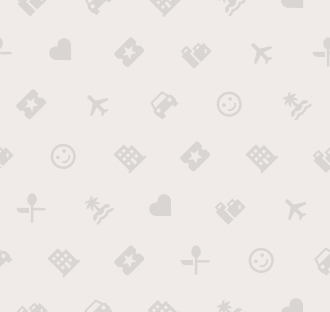
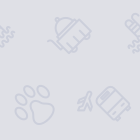

In [81]:
print(bs.prettify())

In [ ]:
dict:{
    city:,
    state:,
    img: img,
    desc: FAQ
}